In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst
import math
from collections import Counter
import datetime


pd.set_option('display.max_columns', None,'display.max_row', None)
# pd.set_option('display.max_rows', 1000)

default_figsize = (15,5)

In [2]:
df = pd.read_csv('unifed_csv_with_multiple_funds.csv')
df.head()

,company_uuid,company_name,country_code,region,city,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,primary_role,num_exits,categories,Financial Services,FinTech,Finance,Blockchain,Information Technology,Software,Payments,Cryptocurrency,Venture Capital,Internet,Banking,Consulting,Mobile Payments,E-Commerce,Insurance,Bitcoin,Artificial Intelligence,Mobile,Crowdfunding,SaaS,Real Estate,Apps,Personal Finance,Accounting,Mobile Apps,Asset Management,Marketplace,Lending,Big Data,Machine Learning,fund_rd_country_code,fund_rd_investment_type,fund_rd_announced_on,fund_rd_raised_amount_usd,fund_rd_post_money_valuation_usd,fund_rd_investor_count,investment_count,any_partner,any_top_partner,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_uuid,funds_raised_amount_usd,acquisitions_acquirer_uuid,acquisitions_acquirer_name,acquisitions_acquirer_country_code,acquisitions_acquirer_region,acquisitions_acquirer_city,acquisitions_acquired_on,acquisitions_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Computer Science,subject_Economics,subject_Finance,subject_Electrical Engineering,subject_Business Administration,subject_Mechanical Engineering,subject_Marketing,subject_Accounting,subject_Law,subject_Business,subject_Computer Engineering,subject_Physics,subject_Political Science,subject_Management,subject_Engineering,subject_Psychology,subject_Mathematics,subject_Chemical Engineering,subject_Chemistry,subject_History,subject_Biology,subject_International Business,subject_Information Technology,subject_Business Management,subject_English,subject_Industrial Engineering,subject_Civil Engineering,subject_Biochemistry,subject_Medicine,subject_Philosophy
0,0001a6ec-e7e9-4d1b-8a77-adb5ac815420,NaN,JPN,Tokyo,Tokyo,operating,"Financial Services,Professional Services",NaN,NaN,2018-01-01,NaN,NaN,unknown,company,NaN,"Finance,Financial Services,Recruiting",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2188.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0003f244-79d0-6178-353e-33dabaf3b2c6,NaN,USA,California,San Francisco,operating,"Financial Services,Lending and Investments",NaN,NaN,2015-06-01,NaN,NaN,51-100,investor,11.0,"Finance,Financial Services,Venture Capital",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68b17343-9ea2-ec57-328b-cf5dbc734cee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2159.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0003f244-79d0-6178-353e-33dabaf3b2c6,NaN,USA,California,San Francisco,operating,"Financial Services,Lending and Investments",NaN,NaN,2015-06-01,NaN,NaN,51-100,investor,11.0,"Finance,Financial Services,Venture Capital",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6b75e09b-dff8-483a-a5dd-31e65d32275f,150000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2159.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0003f244-79d0-6178-353e-33dabaf3b2c6,NaN,USA,California,San Francisco,operating,"Financial Services,Lending and Investments",NaN,NaN,2015-06-01,NaN,NaN,51-100,investor,11.0,"Finance,Financial Services,Venture Capital",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2cac84d5-de75-4412-967e-4b470b18b254,275000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2159.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00057beb-5724-c809-5cd2

In [3]:
df = df.drop(columns = ['category_groups_list', 'funds_uuid', 'acquisitions_acquirer_region', 'acquisitions_acquirer_city',\
                       'company_name', 'categories'])

In [4]:
#Fillna for acquisition prices, selective mean value method
df['acquisitions_acquirer_name'] = df['acquisitions_acquirer_name'].fillna("")
mean = df['acquisitions_price_usd'].mean()
#Selecting 0 or mean to be filled
def fillwhat(df): 
    if df['acquisitions_acquirer_name']=="" :
        return 0
    else :
        return mean

fill_df = df.copy()
fill_df = fill_df[['acquisitions_price_usd','acquisitions_acquirer_name']].apply(fillwhat, axis=1)
fill_df = pd.DataFrame(fill_df)
df['acquisitions_price_usd'] = fill_df

#drop the name column which has no use any more
df = df.drop(columns=['acquisitions_acquirer_name'])

In [5]:
"""
#Fillna for total funds, selective mean value method
df['num_funding_rounds'] = df['num_funding_rounds'].fillna("0")
mean = df['total_funding_usd'].mean()
#Selecting 0 or mean to be filled
def fillwhat(df): 
    if df['num_funding_rounds']==0 :
        return 0
    else :
        return mean

fill_df = df.copy()
fill_df = fill_df[['total_funding_usd','num_funding_rounds']].apply(fillwhat, axis=1)
fill_df = pd.DataFrame(fill_df)
df['total_funding_usd'] = fill_df
"""

'\n#Fillna for total funds, selective mean value method\ndf[\'num_funding_rounds\'] = df[\'num_funding_rounds\'].fillna("0")\nmean = df[\'total_funding_usd\'].mean()\n#Selecting 0 or mean to be filled\ndef fillwhat(df): \n    if df[\'num_funding_rounds\']==0 :\n        return 0\n    else :\n        return mean\n\nfill_df = df.copy()\nfill_df = fill_df[[\'total_funding_usd\',\'num_funding_rounds\']].apply(fillwhat, axis=1)\nfill_df = pd.DataFrame(fill_df)\ndf[\'total_funding_usd\'] = fill_df\n'

In [6]:
#Fillna for coutns, fill with 0 method
df['investment_count'] = df['investment_count'].fillna(0)
df['fund_rd_investor_count'] = df['fund_rd_investor_count'].fillna(0)
df['any_partner'] = df['any_partner'].fillna(0)
df['any_top_partner'] = df['any_partner'].fillna(0)
df['num_exits'] = df['num_exits'].fillna(0)
df['event_count'] = df['event_count'].fillna(0)

df.iloc[:,13:43] = df.iloc[:,13:43].fillna(0)
df.iloc[:,64:] = df.iloc[:,64:].fillna(0)

In [7]:
df.head()

,company_uuid,country_code,region,city,status,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,primary_role,num_exits,Financial Services,FinTech,Finance,Blockchain,Information Technology,Software,Payments,Cryptocurrency,Venture Capital,Internet,Banking,Consulting,Mobile Payments,E-Commerce,Insurance,Bitcoin,Artificial Intelligence,Mobile,Crowdfunding,SaaS,Real Estate,Apps,Personal Finance,Accounting,Mobile Apps,Asset Management,Marketplace,Lending,Big Data,Machine Learning,fund_rd_country_code,fund_rd_investment_type,fund_rd_announced_on,fund_rd_raised_amount_usd,fund_rd_post_money_valuation_usd,fund_rd_investor_count,investment_count,any_partner,any_top_partner,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_raised_amount_usd,acquisitions_acquirer_uuid,acquisitions_acquirer_country_code,acquisitions_acquired_on,acquisitions_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Computer Science,subject_Economics,subject_Finance,subject_Electrical Engineering,subject_Business Administration,subject_Mechanical Engineering,subject_Marketing,subject_Accounting,subject_Law,subject_Business,subject_Computer Engineering,subject_Physics,subject_Political Science,subject_Management,subject_Engineering,subject_Psychology,subject_Mathematics,subject_Chemical Engineering,subject_Chemistry,subject_History,subject_Biology,subject_International Business,subject_Information Technology,subject_Business Management,subject_English,subject_Industrial Engineering,subject_Civil Engineering,subject_Biochemistry,subject_Medicine,subject_Philosophy
0,0001a6ec-e7e9-4d1b-8a77-adb5ac815420,JPN,Tokyo,Tokyo,operating,NaN,NaN,2018-01-01,NaN,NaN,unknown,company,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2188.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0003f244-79d0-6178-353e-33dabaf3b2c6,USA,California,San Francisco,operating,NaN,NaN,2015-06-01,NaN,NaN,51-100,investor,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2159.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0003f244-79d0-6178-353e-33dabaf3b2c6,USA,California,San Francisco,operating,NaN,NaN,2015-06-01,NaN,NaN,51-100,investor,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,150000000.0,NaN,NaN,NaN,0.0,NaN,0.0,2159.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0003f244-79d0-6178-353e-33dabaf3b2c6,USA,California,San Francisco,operating,NaN,NaN,2015-06-01,NaN,NaN,51-100,investor,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,275000000.0,NaN,NaN,NaN,0.0,NaN,0.0,2159.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00057beb-5724-c809-5cd2-a0a7c6b017aa,ESP,Madrid,Madrid,operating,NaN,NaN,2011-01-01,NaN,NaN,1-10,company,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#types_series = df['status'].value_counts()
#print(types_series)

In [9]:
df['status'] = df['status'].fillna("")
operating = []
success = []
closed = []
acquired = []
ipo = []

#If match append 1 otherwise append 0. Equivalent for one-hot encoding
for i in df['status']:
    if "operating" in i:
        operating.append(1)
    else:
        operating.append(0)
    if "acquired" in i or "ipo" in i:
        success.append(1)
        if "acquired" in i:
            acquired.append(1)
        else:
            acquired.append(0)
        if "ipo" in i:
            ipo.append(1)
        else:
            ipo.append(0)
    else:
        success.append(0) 
        acquired.append(0)
        ipo.append(0)
    if "closed" in i:
        closed.append(1)  
    else:
        closed.append(0)  

df.insert(4,'operating',value = operating)
df.insert(5,'closed',value = closed)
df.insert(6,'success',value = success)
df.insert(7,'success_acquired', value = acquired)
df.insert(8,'success_ipo',value = ipo)   
        
#Drop the encoded column
df=df.drop(['status'],axis=1)

In [10]:
#types_series = df['primary_role'].value_counts()
#print(types_series)

In [11]:
df['primary_role'] = df['primary_role'].fillna("")
company = []
investor = []
school = []

#If match append 1 otherwise append 0. Equivalent for one-hot encoding
for i in df['primary_role']:
    if "company" in i:
        company.append(1)
    else:
        company.append(0)
    if "investor" in i:
        investor.append(1)
    else:
        investor.append(0)
    if "school" in i:
        school.append(1)
    else:
        school.append(0)

df.insert(15,'primary_role_company',value = company)
df.insert(16,'primary_role_school',value = school)
df.insert(17,'primary_role_investor', value = investor)
            
#Drop the encoded column
df=df.drop(['primary_role'],axis=1)

In [12]:
df.head()

,company_uuid,country_code,region,city,operating,closed,success,success_acquired,success_ipo,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,primary_role_company,primary_role_school,primary_role_investor,num_exits,Financial Services,FinTech,Finance,Blockchain,Information Technology,Software,Payments,Cryptocurrency,Venture Capital,Internet,Banking,Consulting,Mobile Payments,E-Commerce,Insurance,Bitcoin,Artificial Intelligence,Mobile,Crowdfunding,SaaS,Real Estate,Apps,Personal Finance,Accounting,Mobile Apps,Asset Management,Marketplace,Lending,Big Data,Machine Learning,fund_rd_country_code,fund_rd_investment_type,fund_rd_announced_on,fund_rd_raised_amount_usd,fund_rd_post_money_valuation_usd,fund_rd_investor_count,investment_count,any_partner,any_top_partner,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_raised_amount_usd,acquisitions_acquirer_uuid,acquisitions_acquirer_country_code,acquisitions_acquired_on,acquisitions_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Computer Science,subject_Economics,subject_Finance,subject_Electrical Engineering,subject_Business Administration,subject_Mechanical Engineering,subject_Marketing,subject_Accounting,subject_Law,subject_Business,subject_Computer Engineering,subject_Physics,subject_Political Science,subject_Management,subject_Engineering,subject_Psychology,subject_Mathematics,subject_Chemical Engineering,subject_Chemistry,subject_History,subject_Biology,subject_International Business,subject_Information Technology,subject_Business Management,subject_English,subject_Industrial Engineering,subject_Civil Engineering,subject_Biochemistry,subject_Medicine,subject_Philosophy
0,0001a6ec-e7e9-4d1b-8a77-adb5ac815420,JPN,Tokyo,Tokyo,1,0,0,0,0,NaN,NaN,2018-01-01,NaN,NaN,unknown,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2188.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0003f244-79d0-6178-353e-33dabaf3b2c6,USA,California,San Francisco,1,0,0,0,0,NaN,NaN,2015-06-01,NaN,NaN,51-100,0,0,1,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2159.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0003f244-79d0-6178-353e-33dabaf3b2c6,USA,California,San Francisco,1,0,0,0,0,NaN,NaN,2015-06-01,NaN,NaN,51-100,0,0,1,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,150000000.0,NaN,NaN,NaN,0.0,NaN,0.0,2159.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0003f244-79d0-6178-353e-33dabaf3b2c6,USA,California,San Francisco,1,0,0,0,0,NaN,NaN,2015-06-01,NaN,NaN,51-100,0,0,1,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,275000000.0,NaN,NaN,NaN,0.0,NaN,0.0,2159.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00057beb-5724-c809-5cd2-a0a7c6b017aa,ESP,Madrid,Madrid,1,0,0,0,0,NaN,NaN,2011-01-01,NaN,NaN,1-10,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# #make sure to do <pip install pycountry-convert> and <pip install geopy>
# from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
# from geopy.geocoders import Nominatim

# def get_continent(col):
#     try:
#         cn_a2_code =  country_name_to_country_alpha2(col)
#     except:
#         cn_a2_code = 'Unknown' 
#     try:
#         cn_continent = country_alpha2_to_continent_code(cn_a2_code)
#     except:
#         cn_continent = 'Unknown' 
#     return (cn_a2_code, cn_continent)

# def geolocate(country):
#     try:
#         # Geolocate the center of the country
#         loc = geolocator.geocode(country)
#         # And return latitude and longitude
#         return (loc.latitude, loc.longitude)
#     except:
#         # Return missing value
#         return np.nan
    
    
# country_geo = df[['country_code']].apply(get_continent, axis=1)
# country_geo = df[['country_code']].apply(geolocate, axis=1)

# df.info()

Stardust's attempt at <del>making geopy work</del> making himself go to sleep

In [15]:
# 'World Cities Database' by Simplemaps.com is licensed under CC BY 4.0.
worldcities_df = pd.read_csv('worldcities.csv')
keep_col = ['city', 'lat', 'lng']
worldcities_df = worldcities_df[keep_col]

In [16]:
# city_count_df is used to visualize the world map only
city_count_df = df[['company_uuid', 'city']]

In [17]:
# join df to link up city, count and location (lat, lng)
city_count_df = city_count_df.set_index('city').join(worldcities_df.set_index('city'))
city_count_df.reset_index(inplace=True)
# dropna as they cannot be plotted
city_count_df.dropna(subset=['lat', 'lng'], inplace=True)

The cell below is commented because it takes lots of time to run. It is STILL part of the final code.

In [18]:
# # installation
# # pip install folium

# # Create a world map to show distributions of organizations
# import folium
# from folium.plugins import MarkerCluster

# # empty map
# world_map= folium.Map(tiles="cartodbpositron")
# marker_cluster = MarkerCluster().add_to(world_map)

# # for each coordinate, create circlemarker of city
# for i in range(len(city_count_df)):
#         lat = city_count_df.iloc[i]['lat']
#         lng = city_count_df.iloc[i]['lng']
#         radius = 5
#         popup_text = """City : {}<br>
#                     Count : {}<br>"""
#         popup_text = popup_text.format(city_count_df.iloc[i]['city'],
#                                    city_count_df.iloc[i]['company_uuid']
#                                    )
#         folium.CircleMarker(location=[lat, lng], radius=radius, popup=popup_text, fill=True).add_to(marker_cluster)
# sw = city_count_df[['lat','lng']].min().values.tolist()
# ne = city_count_df[['lat','lng']].max().values.tolist()

# world_map.fit_bounds([sw, ne])
# # show the map
# # world_map

# # export the map as .html file
# world_map.save('world_map_fintech_companies.html')

In [19]:
#region >>?
#city  >>one-hot
#country_code  >>lat and long, one-hot

In [20]:
#acquisitions_acquired_on   >>change to integer values
# find the duration of the job
df['acquisitions_acquired_on'] = datetime.datetime.now() - pd.to_datetime(df['acquisitions_acquired_on'], errors='coerce', format='%d/%m/%Y')
# take mean for NaN
mean = df['acquisitions_acquired_on'].mean()
df['acquisitions_acquired_on'].fillna(value=mean, inplace=True)
# convert TimeDelta to int
df['acquisitions_acquired_on'] = df['acquisitions_acquired_on'].apply(lambda x: x.days)
# By Stardust: how to handle NaN? Too many of them

#ipo_share_price_usd    >>change to yes/no ipos
df['has_ipo'] = 1*~df['ipo_share_price_usd'].isnull()

# df['ipo_share_price_usd']
#acquisitions_acquirer_country >>?

In [21]:
roi_df = pd.read_csv('ROI.csv')
# mean_norm_amount_delta

In [22]:
# sns.jointplot(x='xxx, y='yyy', data=, color = 'k')

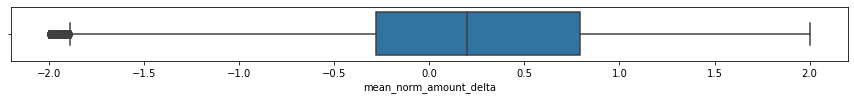

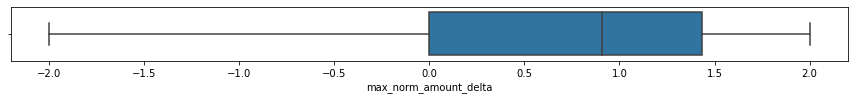

In [23]:
numerical_features = ['mean_norm_amount_delta', 'max_norm_amount_delta']

for feature in numerical_features:
    fig, ax = plt.subplots(figsize=(15,1))
    sns.boxplot(data=roi_df, x=feature)
    plt.show()

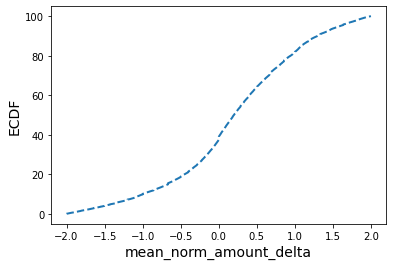

In [24]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(roi_df['mean_norm_amount_delta'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('mean_norm_amount_delta', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

In [25]:
print(np.percentile(roi_df['mean_norm_amount_delta'], [68, 95, 99.7]))

[0.60171391 1.59985767 1.96694215]


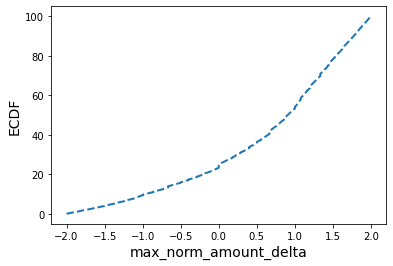

In [26]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(roi_df['max_norm_amount_delta'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('max_norm_amount_delta', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

In [27]:
print(np.percentile(roi_df['max_norm_amount_delta'], [68, 95, 99.7]))

[1.28767123 1.88647895 1.99337455]
